
<img style="float: right;" src="nwu1.png">  <img style="float: left;" src="dara1.png">   
<div class="alert alert-block alert-info">


---
# <center>HartRAO Absolute Flux Calibration</center>
---
# <center>Assignment</center>
---
# <center>Tutors: Job Vorster &  James Chibueze</center>
---
# <center>Student: Dionísio Cândido Nhadelo </center>
---
# <center>April 2022</center>
---

# 1. Coding Assignment

<div class="alert alert-block alert-info">

**This assignment can be done with any single FITS  le from the ”Calibration” folder of HartRAO data.**

<div class="alert alert-block alert-info">

## 1.1. Accessing the data

<div class="alert alert-block alert-info">

### 1.1.1. Write a code to open the calibrator drift scan FITS file with astropy.io.fits. 

In [15]:
# First of all we should import the needed libraries, for this project we just need the following: 

import numpy as np # for mathematical calculations
import matplotlib.pyplot as plt # for data visualization
import astropy.io.fits as fits # for fits files opening
from scipy import stats # for error propagation

In [3]:
# To make things less complicated, lets have the fit file at the same folder as the jupyter notebook

# with fits.open("2013d235_11h55m24s_Cont_mike_VIRGO_A.fits") as hdu:
#     hdu.info()
    

#file_name = "VirgoA_22235/2013d006_03h03m02s_Cont_sharmila_VIRGO_A.fits" # this assignes the data to the variable "file_name"
file_name = "Report Data Sets/Data12.fits"
#The following line of code will allow us to open the file
hdu = fits.open(file_name) # Opens the file and assign it to tha hdu variable
hdu.info() #This will show the details about the opened file

Filename: Report Data Sets/Data12.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   ()      
  1  02.5S         1 BinTableHDU     60   1R x 13C   [1D, 1D, 1D, 8A, 1D, 8A, 1D, 25A, 1D, 1D, 28A, 1D, 1D]   
  2  Scan_0_HPNZ_CAL    1 BinTableHDU    107   128R x 23C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
  3  Scan_1_HPNZ    1 BinTableHDU     95   784R x 23C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
  4  Scan_2_ZC     1 BinTableHDU     95   784R x 23C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
  5  Scan_3_HPSZ    1 BinTableHDU     95   784R x 23C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
  6  Chart         1 BinTableHDU     40   4027R x 3C   [1D, 1D, 1D]   


In [6]:
hdu[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  184 / width of table in bytes                        
NAXIS2  =                  128 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   23 / number of fields in each row                   
EXTNAME = 'Scan_0_HPNZ_CAL'    / name of this binary table extension            
FRONTEND= '02.5S   '           / Frontend ID                                    
CENTFREQ=            12178.593 / [MHz] Backend centre frequency                 
BANDWDTH=                  32. / [MHz] Bandwidth of backend                     
TCAL1   =                11.

<div class="alert alert-block alert-info">

### 1.1.2. Write a code to access the following parameters from headers within the FITS  file.

<div class="alert alert-block alert-info">

Date of Observation.

In [3]:
# To access the date of observation we must check the header of the opened file
hdu[0].header['DATE']
print('The Date of creation of this file was {}.' .format(hdu[0].header['DATE']))

The Date of creation of this file was 2018-02-24T23:10:09.


<div class="alert alert-block alert-info">

Astronomical source of interest.

In [4]:
# We now want to see what was the Astronomical source of interest, for that we have the following:
print('The Astronomical source of interest for this observation was {}.' .format(hdu[0].header["OBJECT"]))

The Astronomical source of interest for this observation was VIRGO A.


<div class="alert alert-block alert-info">

Telescope name.

In [5]:
# The following line of code will access the telescope name:
print('The Telescope is {}.' .format(hdu[0].header["TELESCOP"]))

The Telescope is HartRAO 26m Antenna.


<div class="alert alert-block alert-info">

Nominal system temperature.

In [6]:
# At this point we want to know what is the Nominal system temperature, thic can be done like:
print("The Nominal minimum system temperature is about {}K" .format(hdu[1].header["NOMTSYS"]))

The Nominal minimum system temperature is about 132.0K


<div class="alert alert-block alert-info">

Centre frequency.

In [7]:
# At this point we want to find the centre frequence, for that we do the following:
print("The Backend centre frequency in this observation is : {}MHz" .format(hdu[2].header["CENTFREQ"]))

The Backend centre frequency in this observation is : 12178.593MHz


## 1.2. Noise diode calibration

<div class="alert alert-block alert-info">

**Do all these steps for both polarizations.**

<div class="alert alert-block alert-info">

### 1.2.1. Get the noise diode temperature (with errorbar) from the header.

In [8]:
# Now we are going to find the value of noise diode temperature with the following line of code

# FOR THE CHANNEL_1 WE ARE GOING TO USE TCAL1 AND TCALSIG1
print("The value of the noise diode for channel 1 is {}K ± {}K"\
      .format(hdu[2].header["TCAL1"], hdu[2].header["TCALSIG1"]))

The value of the noise diode for channel 1 is 11.67K ± 0.5K


In [9]:
# Now we are going to find the value of noise diode temperature with the following line of code

# FOR THE CHANNEL_2 WE ARE GOING TO USE TCAL2 AND TCALSIG2
print("The value of the noise diode for channel 2 is {}K ± {}K"\
      .format(hdu[2].header["TCAL2"], hdu[2].header["TCALSIG2"]))

The value of the noise diode for channel 2 is 12.68K ± 0.5K


<div class="alert alert-block alert-info">

### 1.2.2. Plot noise diode counts vs MJD.

(array([860000., 870000., 880000., 890000., 900000., 910000., 920000.,
        930000., 940000., 950000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

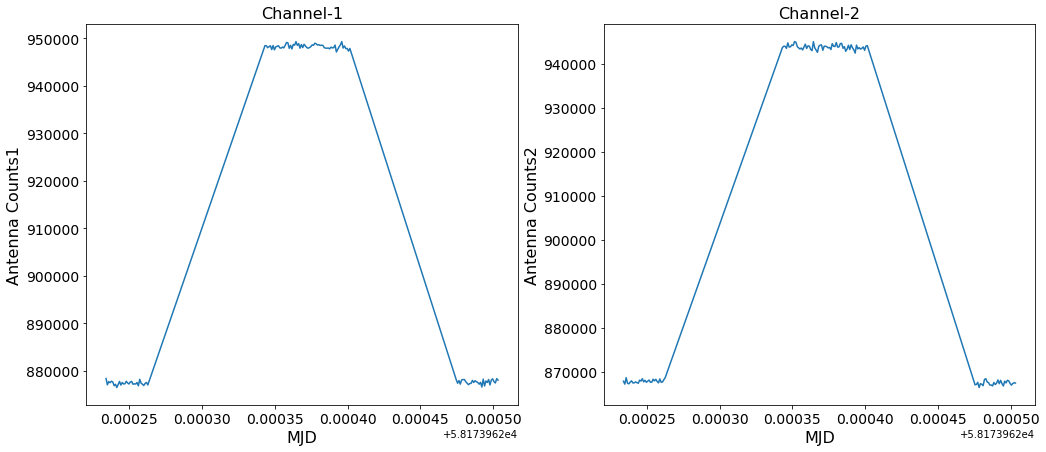

In [10]:
""" We are going to plot the noise diode against the MJD
"""

# Time of observation as Modified Julian Date
noise_MJD = hdu[2].data['MJD']

######################### CHANNEL-1 #######################
plt.figure(figsize=(17,7))
plt.subplot(121)
noise_diode_count1 = hdu[2].data['Count1'] 
plt.plot(noise_MJD,noise_diode_count1)
plt.title("Channel-1",fontsize=16)
plt.xlabel('MJD',fontsize=16)
plt.ylabel('Antenna Counts1',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

######################### CHANNEL-2 #######################
plt.subplot(122)
noise_diode_count2 = hdu[2].data['Count2'] 
plt.plot(noise_MJD,noise_diode_count2)
plt.title("Channel-2",fontsize=16)
plt.xlabel('MJD',fontsize=16)
plt.ylabel('Antenna Counts2',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig("counts_mjd.png")

<div class="alert alert-block alert-info">
    
    
    

### 1.2.3. Calculate the mean background counts (the “off” counts) with numpy.where and numpy.mean.
### 1.2.4. Calculate the average “on” counts with numpy.where and numpy.mean.

In [11]:
"""This part of the code will calculate the mean background for 'off' and 'on' counts
for both polarizations"""

########################### CHANNEL-1 ###########################
on_1 = np.where(noise_diode_count1 > np.mean(noise_diode_count1))[0]
off_1 = np.where(noise_diode_count1 < np.mean(noise_diode_count1))[0]

on_1_mean = np.mean(noise_diode_count1[on_1]) #Mean for "on" counts1
off_1_mean = np.mean(noise_diode_count1[off_1]) #Mean for "off" counts1
on_1_sem = stats.sem(on_1, nan_policy='propagate') #Standard error on mean for "off" counts1
off_1_sem = stats.sem(off_1, nan_policy='propagate') #Standard error on mean for "on" counts1
err_1 = np.sqrt(on_1_sem**2 + off_1_sem**2) #Compute the uncertainties propagation1

print("Off counts for channel-1 : {:.2f} ± {:.2f}".format(off_1_mean, err_1))
print("On  counts for channel-1 : {:.2f} ± {:.2f}".format(on_1_mean, err_1))
print()
########################### CHANNEL-2 ###########################
on_2 = np.where(noise_diode_count2 > np.mean(noise_diode_count2))[0]
off_2 = np.where(noise_diode_count2 < np.mean(noise_diode_count2))[0]

on_2_mean = np.mean(noise_diode_count2[on_2]) #Mean for "on" counts2
off_2_mean = np.mean(noise_diode_count2[off_2]) #Compute the mean for "off" counts2
on_2_sem = stats.sem(on_2, nan_policy='propagate') #Standard error on mean for "off" counts2
off_2_sem = stats.sem(off_2, nan_policy='propagate') #Standard error on mean for "on" counts2
err_2 = np.sqrt(on_2_sem**2 + off_2_sem**2) #Compute the uncertainties propagation2

print("Off counts for channel-2 : {:.2f} ± {:.2f}".format(off_2_mean, err_2))
print("On  counts for channel-2 : {:.2f} ± {:.2f}".format(on_2_mean, err_2))

Off counts for channel-1 : 877575.64 ± 6.58
On  counts for channel-1 : 948253.52 ± 6.58

Off counts for channel-2 : 867679.69 ± 6.58
On  counts for channel-2 : 943795.29 ± 6.58


<div class="alert alert-block alert-info">

### 1.2.4. Calculate the counts per K conversion factor.

In [12]:
"""At this step we are going to calculate the counts per
conversion factor."""

########################### CHANNEL-1 ###########################
noise_temp1 = hdu[2].header['TCAL1'] 
conv1 = (on_1_mean - off_1_mean)/noise_temp1

on_1_sem = stats.sem(on_1, nan_policy='propagate') #Compute the standard error on mean for "off" counts1
off_1_sem = stats.sem(off_1, nan_policy='propagate') #Compute the standard error on mean for "on" counts1
err_11 = np.sqrt(on_1_sem**2 + off_1_sem**2 + hdu[2].header["TCALSIG1"]**2) #Uncertainties propagation1
print("The conversion factor for channel-1 is {:.2f} ± {:.2f} Counts/K" .format(conv1, err_11))


########################### CHANNEL-2 ###########################
noise_temp2 = hdu[2].header['TCAL2'] 
conv2 = (on_2_mean - off_2_mean)/noise_temp2

on_2_sem = stats.sem(on_2, nan_policy='propagate') #Compute the standard error on mean for "off" counts1
off_2_sem = stats.sem(off_2, nan_policy='propagate') #Compute the standard error on mean for "on" counts1
err_12 = np.sqrt(on_2_sem**2 + off_2_sem**2 + hdu[2].header["TCALSIG2"]**2) #Uncertainties propagation1
print("The conversion factor for channel-2 is {:.2f} ± {:.2f} Counts/K" .format(conv2, err_12))

The conversion factor for channel-1 is 6056.37 ± 6.60 Counts/K
The conversion factor for channel-2 is 6002.81 ± 6.60 Counts/K


## 1.3. Drift scan  fitting

<div class="alert alert-block alert-info">

**Do all the following steps for the south, centre and north pointings. As well as for both polarizations.**

<div class="alert alert-block alert-info">

* __Divide the counts with the relevant counts per K conversion factor from the noise diode calibration.__
    

* __Use numpy.where to exclude the signal from the astrophysical source (i.e. the brightest Gaussian in the data).__


* __Fit a polynomial of 3rd order to the rest of the data points with numpy.polyfit.__
    


* __Subtract the polynomial (as a function of MJD) from the counts data to get “baseline corrected” data.__
    
    

* __Fit a Gaussian to the “baseline corrected” data with scipy.optimize.curve fit.__
    

    
* __Store the values of the peaks, and their errors. Hint: The pcov matrix from scipy.optimize.curve fit contains the square of the errors on its diagonal.__
    

    
* __After completing the baseline correction and Gaussian fitting for the north, centre and south pointings (and for both polarization). Write all of the peak values (in K) with errors in a Table, you will need it later.__



In [13]:
"""This will convert the counts to Antenna Temperature
for both polarizations of North, Centre and South."""
##################################### NORTH  ###############################
#Antenna temperature FOR COUNTS 1 & COUNTS 2
north_T1 = hdu[3].data['Count1']/conv1  # From counts to antenna temperature
north_T2 = hdu[3].data['Count2']/conv2  # From counts to antenna temperature
north_mjd = (hdu[3].data['MJD'] - min(hdu[3].data['MJD']))*24*3600 # From days to seconds

##################################### CENTRE  ###############################
#Antenna temperature FOR COUNTS 1 & COUNTS 2
centre_T1 = hdu[4].data['Count1']/conv1 # From counts to antenna temperature
centre_T2 = hdu[4].data['Count2']/conv2 # From counts to antenna temperature
centre_mjd = (hdu[4].data['MJD'] - min(hdu[4].data['MJD']))*24*3600 # From days to seconds

##################################### SOUTH  ###############################
#Antenna temperature FOR COUNTS 1 & COUNTS 2
south_T1 = hdu[5].data['Count1']/conv1 # From counts to antenna temperature
south_T2 = hdu[5].data['Count2']/conv2 # From counts to antenna temperature
south_mjd = (hdu[5].data['MJD'] - min(hdu[5].data['MJD']))*24*3600 # From days to seconds

# <center>NORTH</center>

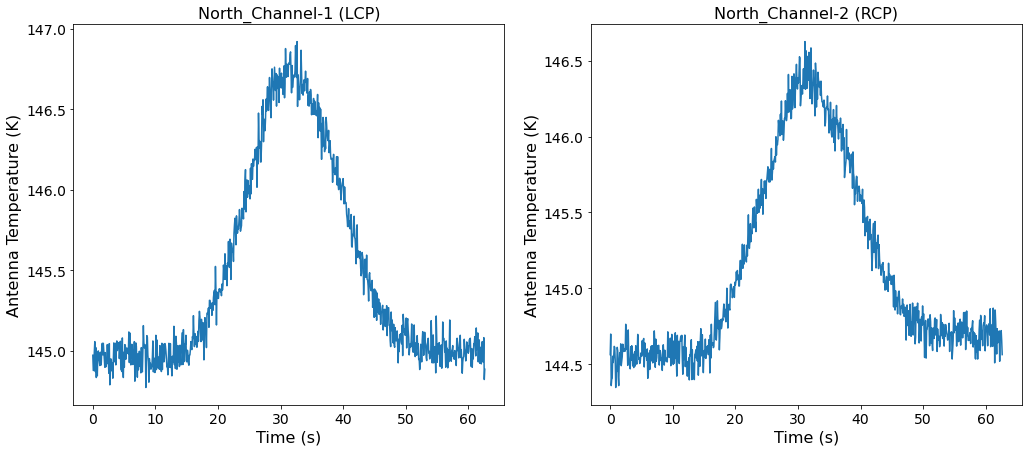

In [14]:
########## LCP PLOT ############# 
plt.figure(figsize=(17,7))
plt.subplot(121)
plt.plot(north_mjd, north_T1)
plt.title("North_Channel-1 (LCP)",fontsize=16)
plt.ylabel("Antenna Temperature (K)",fontsize=16)
plt.xlabel("Time (s)",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

######### RCP PLOT ############
plt.subplot(122)
plt.plot(north_mjd, north_T2)
plt.title("North_Channel-2 (RCP)",fontsize=16)
plt.ylabel("Antenna Temperature (K)",fontsize=16)
plt.xlabel("Time (s)",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("north1.png")

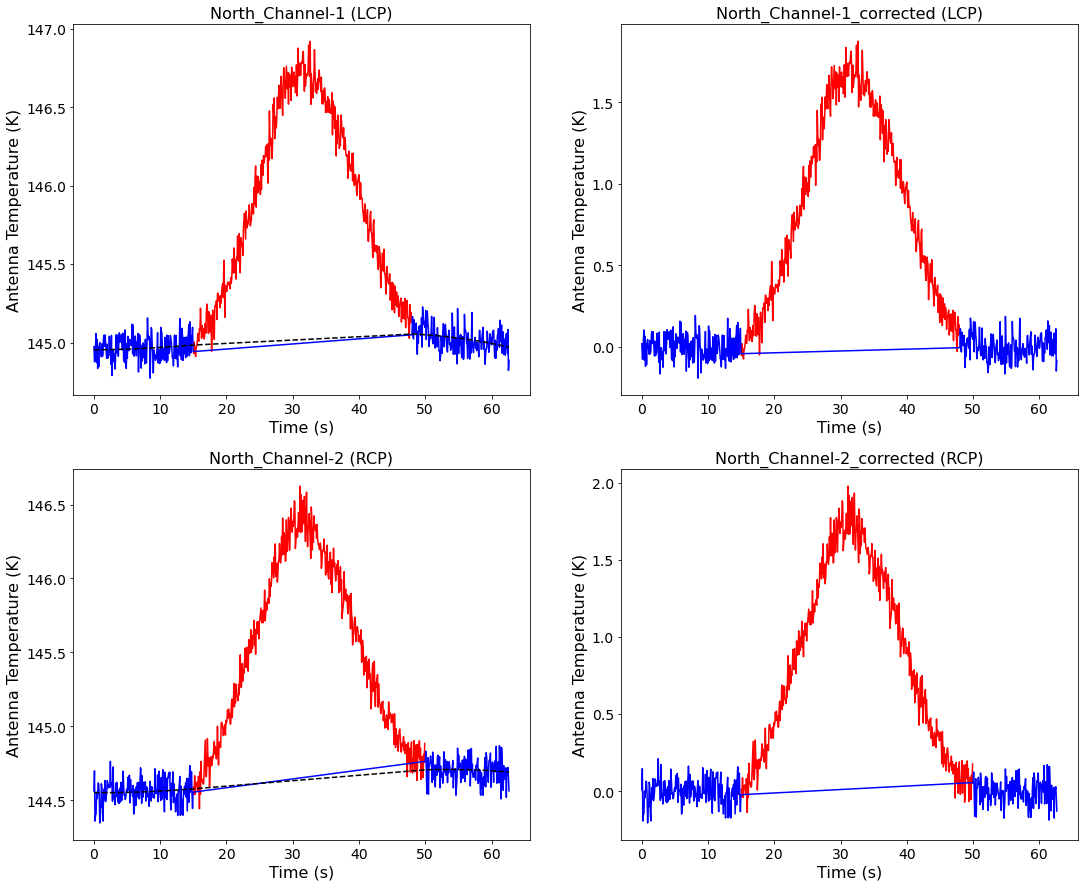

In [15]:
# Baseline correction/subtraction.
# 1. Isolate the "off source" data from the "on source" data.
upper_mjd = 48
lower_mjd = 15
"""
Isolate the 'off' and 'on' antenna temperature for the drift scan.
"""
inds_off = np.where(np.logical_or(north_mjd > upper_mjd,north_mjd < lower_mjd))[0]
inds_on = np.where(np.logical_and(north_mjd < upper_mjd,north_mjd > lower_mjd))[0]

plt.figure(figsize=(18,15))# Figure size
plt.subplot(221)

#Plot the "on" and "off counts"
plt.plot(north_mjd[inds_on],north_T1[inds_on],color='red') #On
plt.plot(north_mjd[inds_off],north_T1[inds_off],color='blue') #Off
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("North_Channel-1 (LCP)", fontsize=16)

#2. Fit a polynomial to the "off source" data.
#np.polyfit(x_data,y_data,order of polynomial)
p = np.polyfit(north_mjd[inds_off],north_T1[inds_off],3)
p1 = np.poly1d(p)
plt.plot(north_mjd[inds_off],p1(north_mjd[inds_off]),color='black',linestyle='dashed')

#3. Subtract the polynomial.
north_T1_corrected = north_T1 - p1(north_mjd) #polynomial_subtracted.
plt.subplot(222)
plt.plot(north_mjd[inds_on],north_T1_corrected[inds_on],color='red')
plt.plot(north_mjd[inds_off],north_T1_corrected[inds_off],color='blue')
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("North_Channel-1_corrected (LCP)", fontsize=16)
#plt.show()

##############################COUNTS2##############################
# Baseline subtraction.
# 1. Isolate the "off source" data from the "on source" data.
upper_mjd = 50
lower_mjd = 15

#Isolate the "off" antenna temperature for the drift scan.
inds_off = np.where(np.logical_or(north_mjd > upper_mjd,north_mjd < lower_mjd))[0]

#Isolate the "on" antenna temperature for the drift scan.
inds_on = np.where(np.logical_and(north_mjd < upper_mjd,north_mjd > lower_mjd))[0]

#Plot the "on" and "off counts"
#plt.figure(figsize=(16,5))
plt.subplot(223)
plt.plot(north_mjd[inds_on],north_T2[inds_on],color='red')
plt.plot(north_mjd[inds_off],north_T2[inds_off],color='blue')
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("North_Channel-2 (RCP)",fontsize=16)

#2. Fit a polynomial to the "off source" data.
#np.polyfit(x_data,y_data,order of polynomial)
p = np.polyfit(north_mjd[inds_off],north_T2[inds_off],3)
p1 = np.poly1d(p)
plt.plot(north_mjd[inds_off],p1(north_mjd[inds_off]),color='black',linestyle='dashed')

#3. Subtract the polynomial.
north_T2_corrected = north_T2 - p1(north_mjd) #polynomial_subtracted.
plt.subplot(224)
plt.plot(north_mjd[inds_on],north_T2_corrected[inds_on],color='red')
plt.plot(north_mjd[inds_off],north_T2_corrected[inds_off],color='blue')
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("North_Channel-2_corrected (RCP)", fontsize=16)

#This is called baseline calibration. You see this all over radio astronomy.
#We calibrated for time dependant gain fluctuations.

plt.savefig("north2.png")
plt.show()

The amplitude of the drift scan is 1.71 ± 0.01 K
The amplitude of the drift scan is 1.73 ± 0.01 K


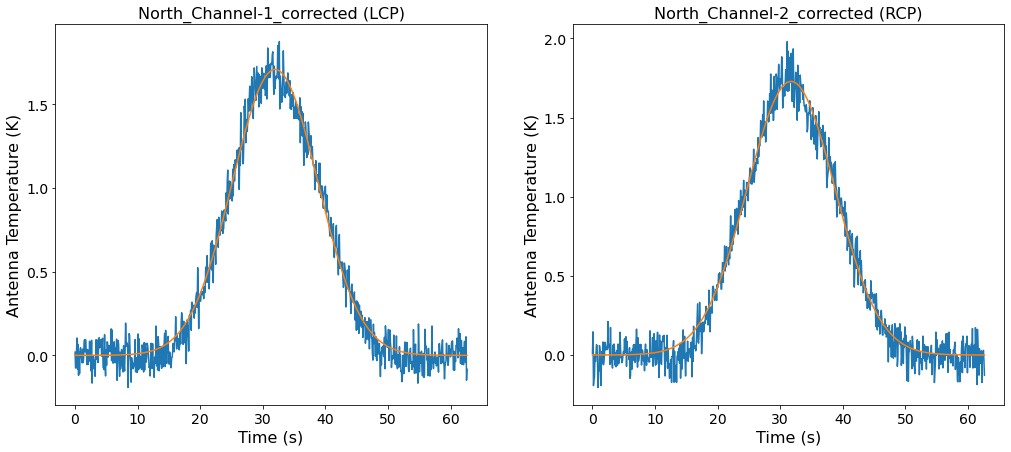

In [16]:
#Fit a gaussian to get the peak.
import scipy.optimize as optim
def gaussian(x,A,mu,sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))
#Use a gaussian by using the function "gaussian(x,A,mu,sigma)"
popt_north,pcov_north = optim.curve_fit(gaussian,\
                                        north_mjd[inds_on],\
                                        north_T1_corrected[inds_on],\
                                        p0=[2.0,33,17])

"""popt_north is an array with the fitted parameters. 
In this case the A, mu and sigma.
pcov_north is a 3x3 matrix which gives the errors of the fit. 
To get the errors use np.sqrt(np.diag(pcov_north))
"""
x = np.arange(min(north_mjd),max(north_mjd),0.01)

plt.figure(figsize=(17,7))
plt.subplot(121)

plt.plot(north_mjd,north_T1_corrected)
plt.plot(x,gaussian(x,*popt_north))
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("North_Channel-1_corrected (LCP)", fontsize=16)
print('The amplitude of the drift scan is %.2f ± %.2f K'%(popt_north[0],\
                                                          np.sqrt(np.diag(pcov_north))[0]))

popt_north2,pcov_north2 = optim.curve_fit(gaussian,\
                                        north_mjd[inds_on],\
                                        north_T2_corrected[inds_on],\
                                        p0=[2.3,30,17])

plt.subplot(122)

plt.plot(north_mjd,north_T2_corrected)
plt.plot(x,gaussian(x,*popt_north2))
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("North_Channel-2_corrected (RCP)", fontsize=16)
plt.savefig("north3.png")

print('The amplitude of the drift scan is %.2f ± %.2f K'%(popt_north2[0],\
                                                          np.sqrt(np.diag(pcov_north2))[0]))

# <center>CENTRE</center>

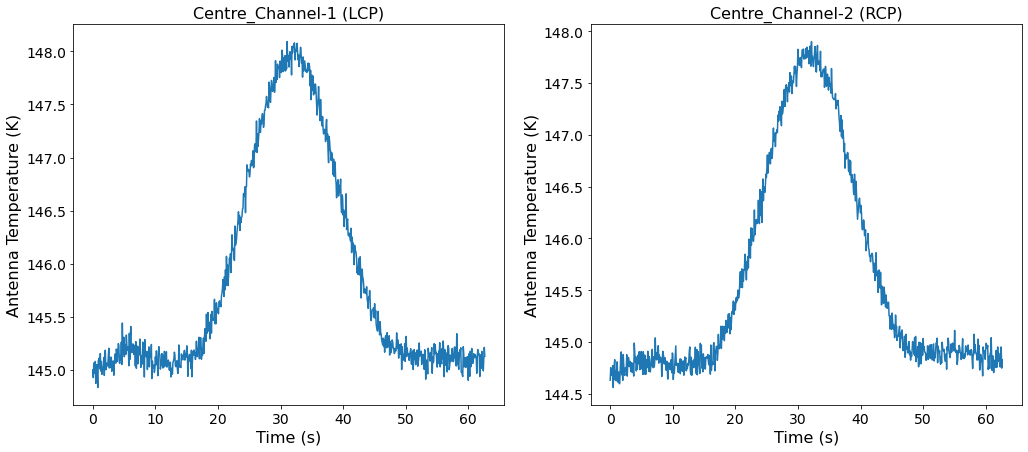

In [17]:
# PLOTS OF 
plt.figure(figsize=(17,7))
plt.subplot(121)
plt.plot(centre_mjd, centre_T1)
plt.title("Centre_Channel-1 (LCP)", fontsize=16)
plt.ylabel("Antenna Temperature (K)", fontsize=16)
plt.xlabel("Time (s)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 
plt.subplot(122)
plt.plot(centre_mjd, centre_T2)
plt.title("Centre_Channel-2 (RCP)", fontsize=16)
plt.ylabel("Antenna Temperature (K)", fontsize=16)
plt.xlabel("Time (s)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("centre1.png")

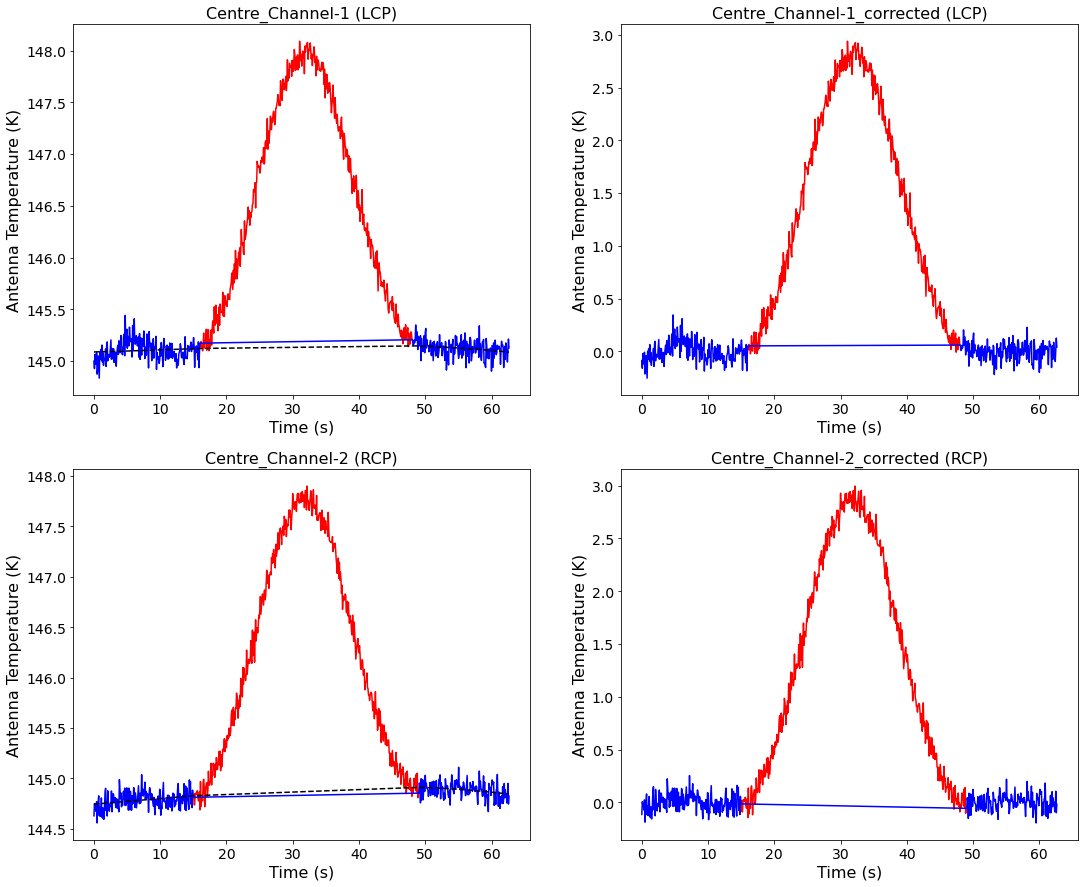

In [18]:
#Baseline subtraction.
#1. Isolate the "off source" data from the "on source" data.
upper_mjd = 48
lower_mjd = 16

#Isolate the "off" antenna temperature for the drift scan.
inds_off = np.where(np.logical_or(centre_mjd > upper_mjd,centre_mjd < lower_mjd))[0]

#Isolate the "on" antenna temperature for the drift scan.
inds_on = np.where(np.logical_and(centre_mjd<upper_mjd,centre_mjd>lower_mjd))[0]

plt.figure(figsize=(18,15))
plt.subplot(221)

#Plot the "on" and "off counts"
plt.plot(centre_mjd[inds_on],centre_T1[inds_on],color='red')
plt.plot(centre_mjd[inds_off],centre_T1[inds_off],color='blue')
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Centre_Channel-1 (LCP)",fontsize=16)

#2. Fit a polynomial to the "off source" data.
#np.polyfit(x_data,y_data,order of polynomial)
p = np.polyfit(centre_mjd[inds_off],centre_T1[inds_off],3)
p1 = np.poly1d(p)
plt.plot(centre_mjd[inds_off],p1(centre_mjd[inds_off]),color='black',linestyle='dashed')
#3. Subtract the polynomial.
centre_T1_corrected = centre_T1-p1(centre_mjd) #polynomial_subtracted.
plt.subplot(222)
plt.plot(centre_mjd[inds_on],centre_T1_corrected[inds_on],color='red')
plt.plot(centre_mjd[inds_off],centre_T1_corrected[inds_off],color='blue')
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Centre_Channel-1_corrected (LCP)",fontsize=16)
#This is called baseline calibration. You see this all over radio astronomy.
#We calibrated for time dependant gain fluctuations.  
#plt.show()


############################COUNTS2###########################
#Baseline subtraction.
#1. Isolate the "off source" data from the "on source" data.
upper_mjd = 49
lower_mjd = 15

#Isolate the "off" antenna temperature for the drift scan.
inds_off = np.where(np.logical_or(centre_mjd > upper_mjd,centre_mjd < lower_mjd))[0]

#Isolate the "on" antenna temperature for the drift scan.
inds_on = np.where(np.logical_and(centre_mjd<upper_mjd,centre_mjd>lower_mjd))[0]

plt.subplot(223)

#Plot the "on" and "off counts"
plt.plot(centre_mjd[inds_on],centre_T2[inds_on],color='red')
plt.plot(centre_mjd[inds_off],centre_T2[inds_off],color='blue')
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Centre_Channel-2 (RCP)",fontsize=16)

#2. Fit a polynomial to the "off source" data.
#np.polyfit(x_data,y_data,order of polynomial)
p = np.polyfit(centre_mjd[inds_off],centre_T2[inds_off],3)
p1 = np.poly1d(p)

plt.plot(centre_mjd[inds_off],p1(centre_mjd[inds_off]),color='black',linestyle='dashed')
#3. Subtract the polynomial.
centre_T2_corrected = centre_T2-p1(centre_mjd) #polynomial_subtracted.
plt.subplot(224)
plt.plot(centre_mjd[inds_on],centre_T2_corrected[inds_on],color='red')
plt.plot(centre_mjd[inds_off],centre_T2_corrected[inds_off],color='blue')
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Centre_Channel-2_corrected (RCP)",fontsize=16)
#This is called baseline calibration. You see this all over radio astronomy.
#We calibrated for time dependant gain fluctuations. 
plt.savefig("centre2.png")
plt.show()



In [19]:
np.mean(inds_off)

381.4373259052925

The amplitude of the drift scan is 2.87 ± 0.01 K
The amplitude of the drift scan is 2.93 ± 0.01 K


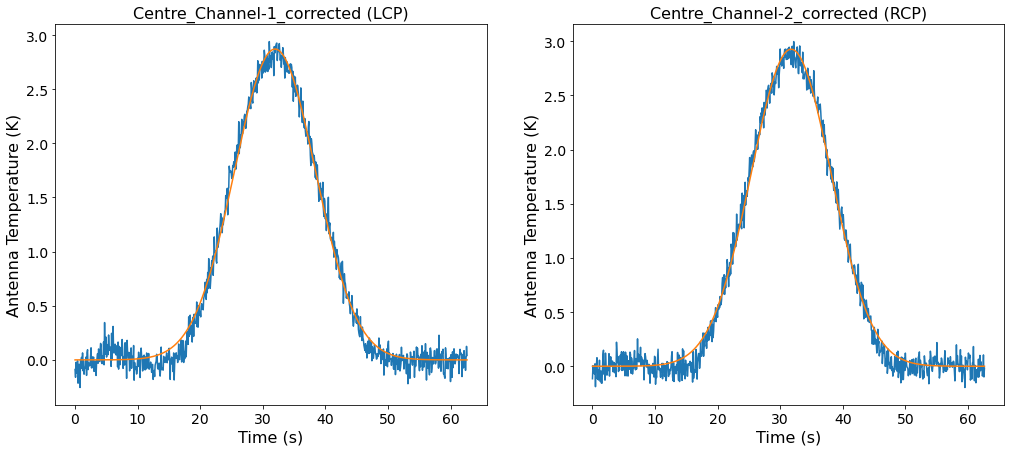

In [20]:
#Fit a gaussian to get the peak.
import scipy.optimize as optim
def gaussian(x,A,mu,sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))
#Use a gaussian by using the function "gaussian(x,A,mu,sigma)"
popt_centre,pcov_centre = optim.curve_fit(gaussian,\
                                          centre_mjd[inds_on],\
                                          centre_T1_corrected[inds_on],\
                                          p0=[2.7,30,18])
#popt_centre is an array with the fitted parameters. In this case the A, mu and sigma.
#pcov_centre is a 3x3 matrix which gives the errors of the fit. To get the errors use np.sqrt(np.diag(pcov_centre))
x = np.arange(min(centre_mjd),max(centre_mjd),0.01)
plt.figure(figsize=(17,7))
plt.subplot(121)
plt.plot(centre_mjd,centre_T1_corrected)
plt.plot(x,gaussian(x,*popt_centre))
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Centre_Channel-1_corrected (LCP)",fontsize=16)

# print('The amplitude of the drift scan is %.2f ± %.2f K'%(popt_centre[0],np.sqrt(np.diag(pcov_centre))[0]))

popt_centre2,pcov_centre2 = optim.curve_fit(gaussian,\
                                          centre_mjd[inds_on],\
                                          centre_T2_corrected[inds_on],\
                                          p0=[3.3,30,18])
plt.subplot(122)
plt.plot(centre_mjd,centre_T2_corrected)
plt.plot(x,gaussian(x,*popt_centre2))
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Centre_Channel-2_corrected (RCP)",fontsize=16)
plt.savefig("centre3.png")

print('The amplitude of the drift scan is %.2f ± %.2f K'%(popt_centre[0],np.sqrt(np.diag(pcov_centre))[0]))

print('The amplitude of the drift scan is %.2f ± %.2f K'%(popt_centre2[0],np.sqrt(np.diag(pcov_centre2))[0]))
plt.show()

# <center>SOUTH</center>

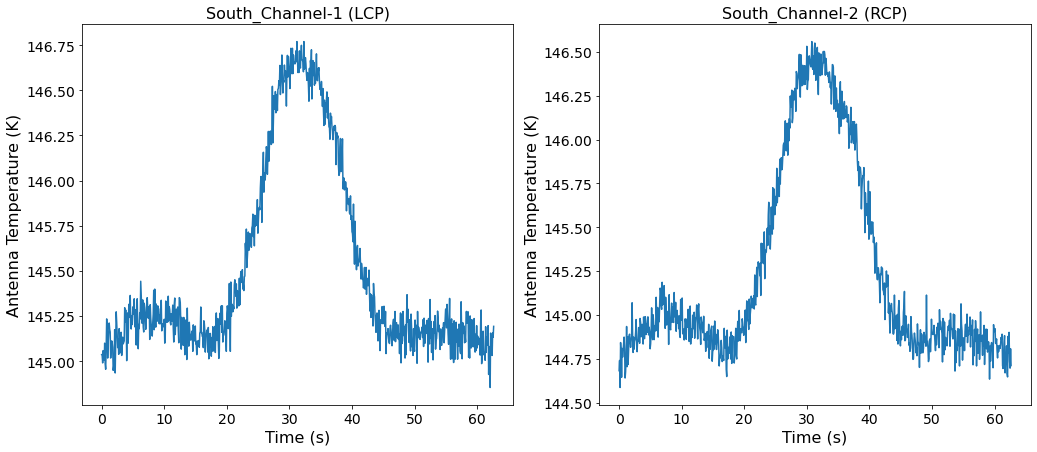

In [21]:
# PLOTS OF 
plt.figure(figsize=(17,7))
plt.subplot(121)
plt.plot(south_mjd, south_T1)
plt.title("South_Channel-1 (LCP)",fontsize=16)
plt.ylabel("Antenna Temperature (K)",fontsize=16)
plt.xlabel("Time (s)",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 
plt.subplot(122)
plt.plot(south_mjd, south_T2)
plt.title("South_Channel-2 (RCP)",fontsize=16)
plt.ylabel("Antenna Temperature (K)",fontsize=16)
plt.xlabel("Time (s)",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("south1.png")
plt.show()

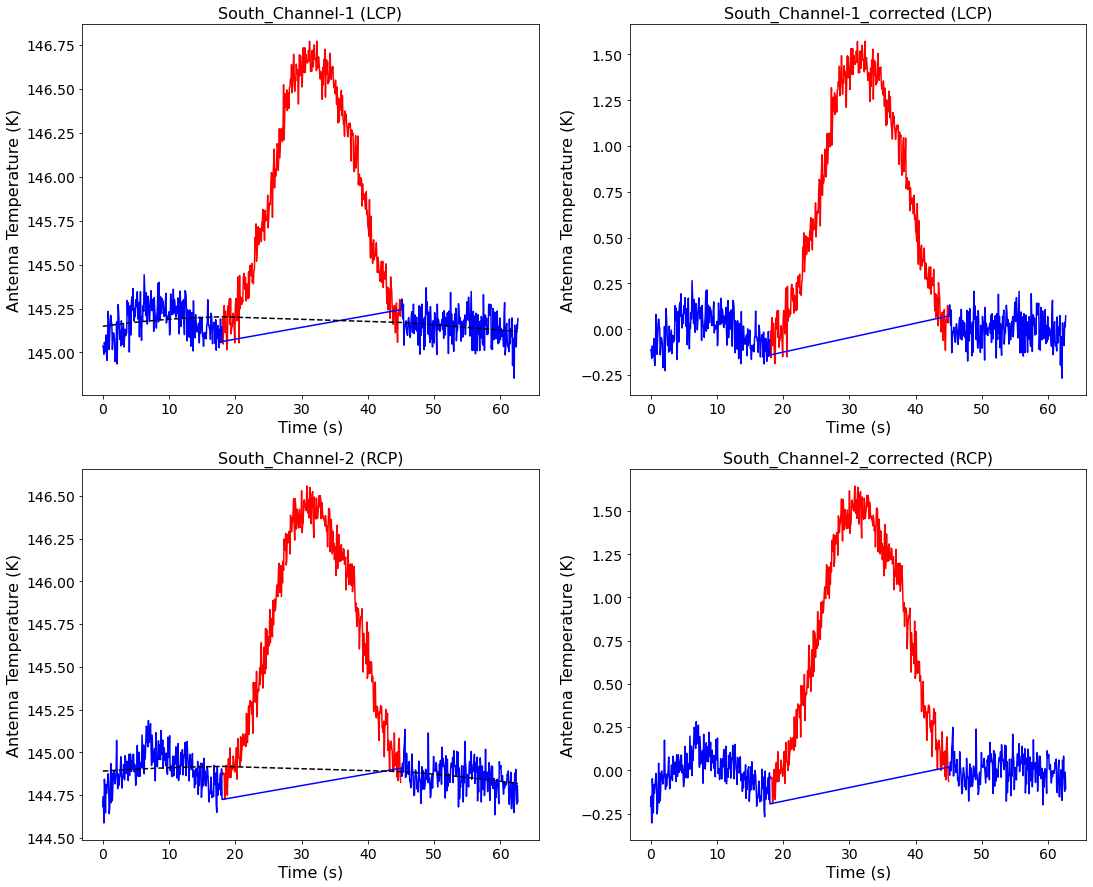

In [22]:
#Baseline subtraction.
#1. Isolate the "off source" data from the "on source" data.

upper_mjd = 45
lower_mjd = 18

#Isolate the "off" antenna temperature for the drift scan.
inds_off = np.where(np.logical_or(south_mjd > upper_mjd,south_mjd < lower_mjd))[0]

#Isolate the "on" antenna temperature for the drift scan.
inds_on = np.where(np.logical_and(south_mjd<upper_mjd,south_mjd>lower_mjd))[0]

plt.figure(figsize=(18,15))
plt.subplot(221)

#Plot the "on" and "off counts"
plt.plot(south_mjd[inds_on],south_T1[inds_on],color='red')
plt.plot(south_mjd[inds_off],south_T1[inds_off],color='blue')
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("South_Channel-1 (LCP)",fontsize=16)

#2. Fit a polynomial to the "off source" data.
#np.polyfit(x_data,y_data,order of polynomial)
p = np.polyfit(south_mjd[inds_off],south_T1[inds_off],3)
p1 = np.poly1d(p)
plt.plot(south_mjd[inds_off],p1(south_mjd[inds_off]),color='black',linestyle='dashed')
#3. Subtract the polynomial.
south_T1_corrected = south_T1-p1(south_mjd) #polynomial_subtracted.
plt.subplot(222)
plt.plot(south_mjd[inds_on],south_T1_corrected[inds_on],color='red')
plt.plot(south_mjd[inds_off],south_T1_corrected[inds_off],color='blue')
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("South_Channel-1_corrected (LCP)",fontsize=16)

#This is called baseline calibration. You see this all over radio astronomy.
#We calibrated for time dependant gain fluctuations.  



################################COUNTS2##########################

#Baseline subtraction.
#1. Isolate the "off source" data from the "on source" data.

upper_mjd = 45
lower_mjd = 18

#Isolate the "off" antenna temperature for the drift scan.
inds_off = np.where(np.logical_or(south_mjd > upper_mjd,south_mjd < lower_mjd))[0]

#Isolate the "on" antenna temperature for the drift scan.
inds_on = np.where(np.logical_and(south_mjd<upper_mjd,south_mjd>lower_mjd))[0]


plt.subplot(223)

#Plot the "on" and "off counts"
plt.plot(south_mjd[inds_on],south_T2[inds_on],color='red')
plt.plot(south_mjd[inds_off],south_T2[inds_off],color='blue')
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("South_Channel-2 (RCP)",fontsize=16)

#2. Fit a polynomial to the "off source" data.
#np.polyfit(x_data,y_data,order of polynomial)
p = np.polyfit(south_mjd[inds_off],south_T2[inds_off],3)
p1 = np.poly1d(p)
plt.plot(south_mjd[inds_off],p1(south_mjd[inds_off]),color='black',linestyle='dashed')

#3. Subtract the polynomial.
south_T2_corrected = south_T2-p1(south_mjd) #polynomial_subtracted.
plt.subplot(224)
plt.plot(south_mjd[inds_on],south_T2_corrected[inds_on],color='red')
plt.plot(south_mjd[inds_off],south_T2_corrected[inds_off],color='blue')
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("South_Channel-2_corrected (RCP)",fontsize=16)
plt.savefig("south2.png")

#This is called baseline calibration. You see this all over radio astronomy.
#We calibrated for time dependant gain fluctuations.  
plt.show()

The amplitude of the drift scan is 1.53 ± 0.01 K
The amplitude of the drift scan is 1.60 ± 0.01 K


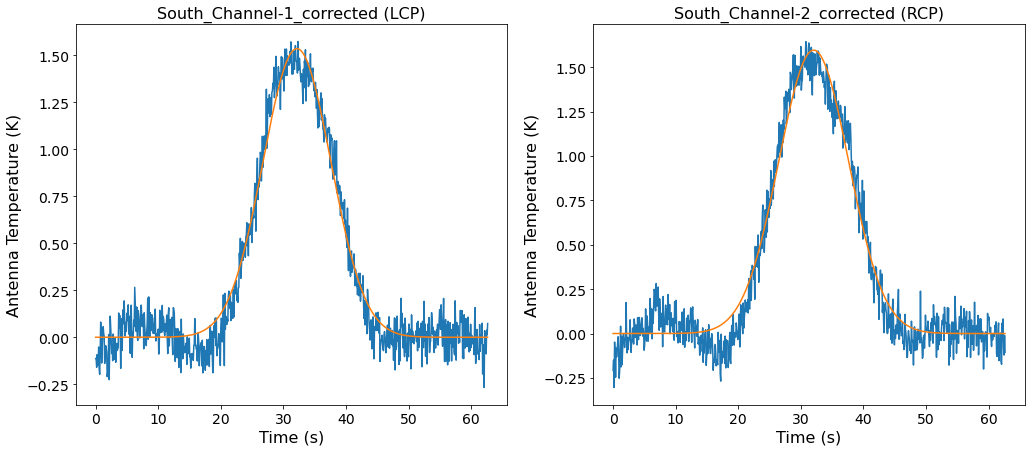

In [23]:
#Fit a gaussian to get the peak.
import scipy.optimize as optim
def gaussian(x,A,mu,sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

#Use a gaussian by using the function "gaussian(x,A,mu,sigma)"
popt_south,pcov_south = optim.curve_fit(gaussian,south_mjd[inds_on],south_T1_corrected[inds_on],p0=[1.6,30,17])
#popt_south is an array with the fitted parameters. In this case the A, mu and sigma.
#pcov_south is a 3x3 matrix which gives the errors of the fit. To get the errors use np.sqrt(np.diag(pcov_south))
x = np.arange(min(south_mjd),max(south_mjd),0.01)

plt.figure(figsize=(17,7))
plt.subplot(121)

plt.plot(south_mjd,south_T1_corrected)
plt.plot(x,gaussian(x,*popt_south))
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("South_Channel-1_corrected (LCP)", fontsize=16)

#print('The amplitude of the drift scan is %.2f ± %.2f K'%(popt_south[0],np.sqrt(np.diag(pcov_south))[0]))

popt_south2,pcov_south2 = optim.curve_fit(gaussian,south_mjd[inds_on],south_T2_corrected[inds_on],p0=[1.8,30,17])
plt.subplot(122)

plt.plot(south_mjd,south_T2_corrected)
plt.plot(x,gaussian(x,*popt_south2))
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("South_Channel-2_corrected (RCP)", fontsize=16)
plt.savefig("south3.png")
print('The amplitude of the drift scan is %.2f ± %.2f K'%(popt_south[0],np.sqrt(np.diag(pcov_south))[0]))
print('The amplitude of the drift scan is %.2f ± %.2f K'%(popt_south2[0],np.sqrt(np.diag(pcov_south2))[0]))
plt.show()




## 1.4. Pointing correction

<div class="alert alert-block alert-info">

* __Fit a Gaussian to the peak values of the north, centre and south scans as your y-values and [0,1,2] as your x values with scipy.optimize.curve fit, you have to take the errors on the peaks into account. This is done by set- ting sigma equal to an array of your peak errors and absolute sigma=True within scipy.optimize.curve fit.__
    
    
* __Calculate the pointing correction by calculating the ratio between the Gaussian peak above, and the peak of the centre drift scan.__

    
    
* __Write down the pointing correction (with their errors) for both polariza- tions.__
    
    


/Users/macbookPro/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Pointing correction factor: 1.001


/Users/macbookPro/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Pointing correction factor: 1.001


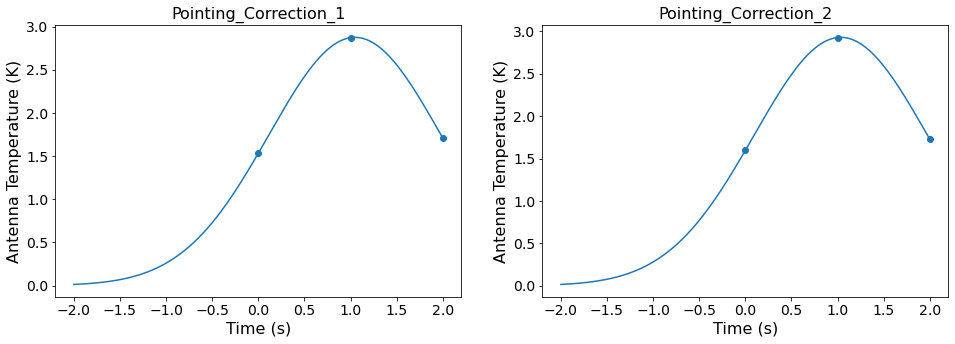

In [25]:
#Now we have fitted the North, South and Centre scans. 
x = [0,1,2]
scan_amplitudes = [popt_south[0],popt_centre[0],popt_north[0]]
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.scatter(x,scan_amplitudes)

plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Pointing_Correction_1", fontsize=16)
#Pointing correction:
popt_pointing, pcov_pointing  = optim.curve_fit(gaussian,x, \
                                                scan_amplitudes,p0=[2.7,1,1])
x = np.arange(-2,2,0.01)
plt.plot(x,gaussian(x,*popt_pointing))
#Pointing correction factor: 
print('Pointing correction factor: %.3f'%(popt_pointing[0]/popt_centre[0])) 
pointing_correction1 = popt_pointing[0]/popt_centre[0]

##########################
plt.subplot(122)

x2 = [0,1,2]
scan_amplitudes2 = [popt_south2[0],popt_centre2[0],popt_north2[0]]
plt.scatter(x2,scan_amplitudes2)

plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Antenna Temperature (K)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Pointing_Correction_2", fontsize=16)
#Pointing correction:
popt_pointing2, pcov_pointing2  = optim.curve_fit(gaussian,x2, \
                                                 scan_amplitudes2,p0=[2.8,1,1])
x1 = np.arange(-2,2,0.01)
plt.plot(x1,gaussian(x1,*popt_pointing2))
#Pointing correction factor: 
print('Pointing correction factor: %.3f'%(popt_pointing2[0]/popt_centre2[0])) 
pointing_correction2 = popt_pointing2[0]/popt_centre2[0]

plt.savefig("point.png")
plt.show()

## 1.5. Flux density calculation

<div class="alert alert-block alert-info">

**The last thing we need to do is to calculate the  flux density of the source so that we can calculate the ratio between the real  flux density and the antenna temperature to get the point source sensitivity (PSS).**

<div class="alert alert-block alert-info">

**Get the paper: Ott M., Witzel A., et al., 1994, AA, 284, 331.**

<div class="alert alert-block alert-info">

**Use the equation from Table 5 of the Ott et al., 1994 to calculate the
“real”  flux density of your astrophysical source.**


**$$log S[Jy] = a + b * log\nu[MHZ] + c * log^2\nu[MHZ]$$**

In [26]:
"""Calculate the PSS. The PSS is a factor that you multiply 
to your antenna temperature to get flux density.
#PSS has units of Jy/K. """

nu = hdu[2].header["CENTFREQ"] # frequency of observation
def ott(nu,a,b,c):
    return 10**(a+b*np.log10(nu)+c*np.log10(nu)**2)

print("The flux density at {} MHz for Virgo A is {:.2f} Jy"\
      .format(nu,(ott(nu,4.484,-0.603,-0.0280))))
#The final answer.
VirA_flux  = ott(nu,4.484,-0.603,-0.0280)

PSS_1 = VirA_flux / (popt_centre[0]*pointing_correction1)
PSS_2 = VirA_flux / (popt_centre2[0]*pointing_correction2)


#The final answer.
print("The PSS for this polarizatio (1) for this observation is {:.2f} ± {:.2f} Jy/K"\
      .format(PSS_1, np.sqrt(np.diag(pcov_centre))[0]))
print("The PSS for this polarizatio (2) for this observation is {:.2f} ± {:.2f} Jy/K"\
      .format(PSS_2, np.sqrt(np.diag(pcov_centre2))[0]))

#You will have to do this for both polarizations. 
#You will have to take errors into account. 

The flux density at 12178.593 MHz for Virgo A is 35.73 Jy
The PSS for this polarizatio (1) for this observation is 12.43 ± 0.01 Jy/K
The PSS for this polarizatio (2) for this observation is 12.20 ± 0.01 Jy/K


<div class="alert alert-block alert-info">

**The ratio of the “real”  flux density (in Jy) and the antenna temperature peak of the centre drift scan multiplied with the pointing correction is our  final result. The PSS.**

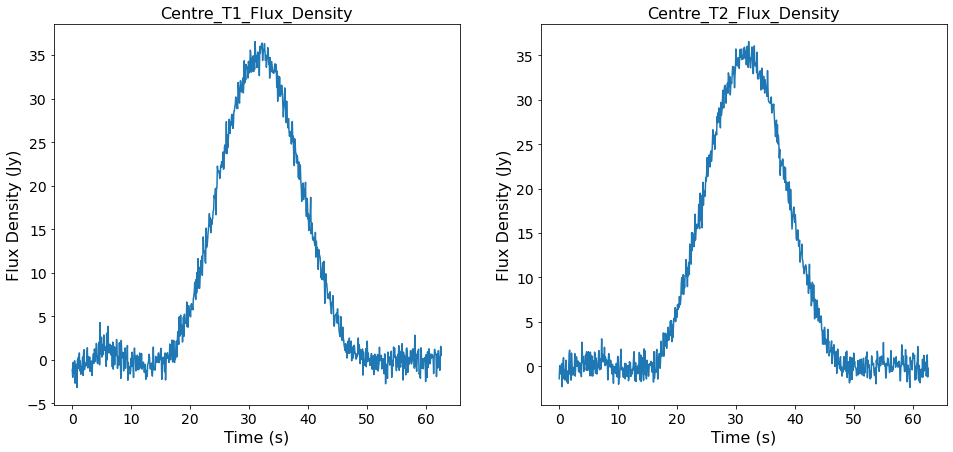

In [27]:
plt.figure(figsize=(16,7))
plt.subplot(121)
plt.plot(centre_mjd,centre_T1_corrected*PSS_1)

plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Flux Density (Jy)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Centre_T1_Flux_Density",fontsize=16)

plt.subplot(122)
plt.plot(centre_mjd,centre_T2_corrected*PSS_2)

plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Flux Density (Jy)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Centre_T2_Flux_Density",fontsize=16)
#plt.show()
#plt.show()
plt.savefig("flux.png")